## Определение перспективного тарифа для телеком-компании «Мегалайн»


    
Целью проекта является анализ данных федерального оператора сотовой связи «Мегалайн» для определения приоритетности развития тарифных планов в зависимости от их доходности и корректировки в этой связи рекламного бюджета.  В нашем распоряжении данные 500 пользователей «Мегалайна» за 2018 год, которые используют тарифы «Смарт» и «Ультра». В ходе исследования мы проанализируем поведение клиентов, произведем рассчеты об использовании всех видов связи (телефонные переговоры, отправка сообщений, пользование интернетом) по объему и доходности по каждому из пользовательских тарифов. 
    
    
Перед началом исследования мы проведем предобработку данных - установим наличие ошибок, при необходимости изменим тип данных. Поскольку по условию проекта необходимо проанализировать среднемесячные данные, мы создадим отдельные столбцы об использовании каждого вида связи по месяцам и датасеты с данными выручки за каждый месяц с каждого клиента по видам тарифов. В процессе подготовки данных и по мере исследования применим методы объединения датафреймов (исходных и новых), группировки, математические операции, построим графики распределений. 
    
    
Проанализируем полученные цифровые показатели, гистограммы, сформулируем гипотезы относительно финансовой приоритетности тарифов и территорий развития для компании «Мегалайн», которые проверим программными методами. На основе исследования сформулируем выводы. 

### Открываем файлы с данными и изучаем их. 


In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st

In [2]:
data_users = pd.read_csv('C:/Users/User/Downloads/users.csv')
display(data_users.head())
data_users.info()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [3]:
data_tariffs = pd.read_csv('C:/Users/User/Downloads/tariffs.csv')
display(data_tariffs)
data_tariffs.info()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [4]:
data_internet = pd.read_csv('C:/Users/User/Downloads/internet.csv')
display(data_internet.head())
data_internet.info()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [5]:
data_messages = pd.read_csv('C:/Users/User/Downloads/messages.csv')
display(data_messages.head())
data_messages.info()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [6]:
data_calls = pd.read_csv('C:/Users/User/Downloads/calls.csv')
display(data_calls.head())
data_calls.info()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


### Проводим предобработку данных. 

Проверяем наличие дубликатов в открытых файлах

In [7]:
print("Дубликатов:", data_users.duplicated().sum())
print("Дубликатов:",data_tariffs.duplicated().sum())
print("Дубликатов:",data_internet.duplicated().sum())
print("Дубликатов:",data_messages.duplicated().sum())
print("Дубликатов:",data_calls.duplicated().sum())

Дубликатов: 0
Дубликатов: 0
Дубликатов: 0
Дубликатов: 0
Дубликатов: 0


 Тип данных  столбцов data_internet['session_date'], data_messages['message_date'], data_calls['call_date'] показан как 'object', методом astype() переводим в'datetime64'.

In [8]:
data_internet['session_date'] = data_internet['session_date'].astype('datetime64')
data_messages['message_date'] = data_messages['message_date'].astype('datetime64')
data_calls['call_date'] = data_calls['call_date'].astype('datetime64')

Тип данных столбца 'duration' показан в минутах как 'float'. По условию проекта расчет длительности телефонных разговоров, согласно тарифам, осуществляется таким образом, что каждый звонок, даже если он длился всего 1 секунду, будет засчитан как 1 минута. Следовательно, для подсчета количества минут разговора в соответствии с условиями тарифа необходимо продолжительность каждого разговора представить в минутах с округленем в большую сторону. Для этого используем метод ceil() библиотеки numpy, которую мы импортировали. Округленные таким образом минуты разговоров представим в цельночисленном виде методом 'int'. 

In [9]:
data_calls['duration'] = np.ceil(data_calls['duration']).astype('int')
data_calls['duration']

0          0
1          0
2          3
3         14
4          6
          ..
202602     1
202603    19
202604    11
202605     5
202606    20
Name: duration, Length: 202607, dtype: int32

 При открытии файла '/datasets/internet.csv' был обнаружен безымянный столбец Unnamed, который появился по умолчанию. Несмотря на то, что он не помешает анализу, удалим его методом drop(), примененным к указанному столбцу. 

In [10]:
data_internet = data_internet.drop(['Unnamed: 0'], axis=1)
display(data_internet.head())
data_internet.info()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.6+ MB


 Все открытые нами файлы, за исключением data_users полностью заполнены данными. Пропуски в  столбце 'churn_date' датасета data_users означают, что пользователи на момент выгрузки информации пользовались услугами компании «Мегалайн». Данные пропуски анализу не помешают. 

 По условию проекта нам необходимо рассчитать помесячно для каждого пользователя количество сделанных звонков и израсходованных минут разговора, количество отправленных сообщений, объем израсходованного интернет-трафика, помесячную выручку. В указанной связи создадим столбцы с информацией о месяце пользования связью. 

In [11]:
data_internet['month'] = data_internet.loc[:, 'session_date'].dt.month
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
 4   month         149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.7+ MB


In [12]:
data_messages['month'] = data_messages.loc[:, 'message_date'].dt.month
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
 3   month         123036 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.8+ MB


In [13]:
data_calls['month'] = data_calls.loc[:, 'call_date'].dt.month
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  int32         
 3   user_id    202607 non-null  int64         
 4   month      202607 non-null  int64         
dtypes: datetime64[ns](1), int32(1), int64(2), object(1)
memory usage: 7.0+ MB


### Исследовательский анализ данных

#### Создание датафреймов по тарифам

 Для проведения сравнительного анализа выгодности тарифов «Смарт» и «Ультра» по каждому виду связи, а также в соответствии с условиями проекта посчитаем для каждого пользователя помесячно данные о  помесячной выручке компании с каждого пользователя. Для этого  применим следующую тактику. Сначала создадим единый датафрейм  с информацией об использовании каждого вида связи (интернет-сессий, телефонных переговоров, направлении смс). После этого в объединенном датафрейме создадим столбец с переплатой за каждый вид связи в соответствии  с тарифом, столбец об общей сумме оплаты в соответствии с тарифом. На основании сводной таблицы  можно будет провсти анализ поведения клиентов по использованию каждого вида связи в зависимости от тарифа, города  проживания. 

 В объединяемых таблицах data_internet, data_messages и data_calls имеется по три столбца с одинаковыми наименованиями: 'id', 'user_id' и 'month'. Перед объединением проведем группировку каждой из них методом groupby() по 'user_id' и 'month' с применением соответствующего агрегирующего метода к столбцу группировки по интересующму виду связи. После чего методом merge() объединим таблицы в одну. 

In [14]:
inet = data_internet.groupby(['user_id', 'month'])['mb_used'].sum().to_frame().reset_index()
inet

,user_id,month,mb_used
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91
...,...,...,...
3198,1498,10,20579.36
3199,1499,9,1845.75
3200,1499,10,17788.51
3201,1499,11,17963.31


In [15]:
calls = data_calls.groupby(['user_id', 'month'])['duration'].sum().to_frame().reset_index()
calls

,user_id,month,duration
0,1000,5,159
1,1000,6,172
2,1000,7,340
3,1000,8,408
4,1000,9,466
...,...,...,...
3169,1498,10,247
3170,1499,9,70
3171,1499,10,449
3172,1499,11,612


In [16]:
all_df = calls.merge(inet, on = ['user_id', 'month'], how = 'outer')
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   3214 non-null   int64  
 1   month     3214 non-null   int64  
 2   duration  3174 non-null   float64
 3   mb_used   3203 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 125.5 KB


 Группируем таблицу data_messages с указанием столбцов 'user_id' и 'month', с применением метода count() к столбцу 'id', в котором получаем данные о количестве направленных смс конкретным пользователем в определенный месяц.

In [17]:
messages = data_messages.groupby(['user_id', 'month'])['id'].count().to_frame().reset_index()
messages

,user_id,month,id
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


 Формируем сводную таблицу с данными об уникальном номере пользователя, месяце пользования связью, количестве минут телефонных разговоров, объеме использованного интернет-трафика, количестве направленны смс. Присаиваем столбцам более информативные наименования.

In [18]:
all_df = all_df.merge(messages, on = ['user_id', 'month'], how = 'outer')
all_df.rename(columns={'duration': 'calls_duration', 'id': 'sms'}, inplace=True)
all_df

,user_id,month,calls_duration,mb_used,sms
0,1000,5,159.0,2253.49,22.0
1,1000,6,172.0,23233.77,60.0
2,1000,7,340.0,14003.64,75.0
3,1000,8,408.0,14055.93,81.0
4,1000,9,466.0,14568.91,57.0
...,...,...,...,...,...
3209,1489,8,NaN,11050.56,17.0
3210,1489,9,NaN,17206.30,32.0
3211,1489,10,NaN,19559.44,21.0
3212,1489,11,NaN,17491.56,20.0


 Объединяем all_df с  data_users, в которой содержатся сведения о наименовании тарифа, городе пользователя. Оставляем столбцы, необходимые для анализа: месяце пользования связью, объеме использования конкретного вида связи, виде тарифа и городе. 

In [19]:
all_df = all_df.merge(data_users, on = 'user_id', how = 'left')
all_df = all_df[['user_id','month','calls_duration', 'mb_used','sms', 'tariff', 'city']].reset_index(drop=True)
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         3214 non-null   int64  
 1   month           3214 non-null   int64  
 2   calls_duration  3174 non-null   float64
 3   mb_used         3203 non-null   float64
 4   sms             2717 non-null   float64
 5   tariff          3214 non-null   object 
 6   city            3214 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 175.9+ KB


 Для получения данных о переплате каждым клиентом за каждый месяц за конкретный вид связи напишем три функции в результе работы которых сформируем три столбца с помесячной суммой переплаты  по каждому виду связи. В теле функций пропишем условия, согласно которым для каждого вида тарифа произведем расчеты: из объема использованной связи вычтем лимит, предусмотренный тарифом. Израсходованный сверх лимита объем умножим на стоимость единицы услуги, предусмотренную тарифным планом. Для случаев, когда объем фактически использованной связи меньше предусмотренного тарифом, чтоб не получить отрицательный результат применим к вычитанию метод  max(), которому передадим результат вычитания и 0. В этом случае при отрицательном, либо нулевом результате будет выбрано нулевое значение, которое при умножении на сверхлимитную стоимость будет равно 0 (то есть переплата по тарифу отсутствует).    

 Создаем функцию для создания столбца с переплатой за телефонные разговоры.

In [20]:
def minutes_pay(row):
    if row['tariff'] == 'smart':
        minutes_pay = max(row['calls_duration'] - data_tariffs.loc[0, 'minutes_included'], 0) * data_tariffs.loc[0, 'rub_per_minute']
    else:
        minutes_pay = max(row['calls_duration'] - data_tariffs.loc[1, 'minutes_included'], 0) * data_tariffs.loc[1, 'rub_per_minute']
    return minutes_pay
all_df['minutes_pay'] = all_df.apply(minutes_pay, axis=1)

 Создаем функцию для создания столбца с переплатой за сверхлимитные сообщения.

In [21]:
def  messages_pay(row):
    if row['tariff'] == 'ultra':
         messages_pay = max(row['sms'] - data_tariffs.loc[1, 'messages_included'], 0) * data_tariffs.loc[1, 'rub_per_message']
    else:
         messages_pay = max(row['sms'] - data_tariffs.loc[0, 'messages_included'], 0) * data_tariffs.loc[0, 'rub_per_message']
    return  messages_pay
all_df['messages_pay'] = all_df.apply(messages_pay, axis=1)

 Пишем  функцию для столбца с переплатой за сверхлимитное пользование интернетом. 

 В соответствии с  условием проекта перед созданием столбца с переплатой за сверхлимитное пользование интернетом проводим следующее. Поскольку данные столбца 'mb_used' показаны в мегабайтах, а подсчет оплаты производится за исрасходованные гигабайты (с округлением остатка в большую сторону), переводим их в в гигабайты, путем деления на 1024 (Мб в 1 Гб).    

In [22]:
all_df['mb_used'] = np.ceil(all_df['mb_used']/1024)
display(all_df['mb_used'])

0        3.0
1       23.0
2       14.0
3       14.0
4       15.0
        ... 
3209    11.0
3210    17.0
3211    20.0
3212    18.0
3213    17.0
Name: mb_used, Length: 3214, dtype: float64

 Такой же перевод проводим  для столбца 'mb_per_month_included' датафрейма data_tariffs.

In [23]:
data_tariffs['mb_per_month_included'] = np.ceil(data_tariffs['mb_per_month_included']/1024)
display(data_tariffs['mb_per_month_included'])

0    15.0
1    30.0
Name: mb_per_month_included, dtype: float64

 Теперь пишем функцию.

In [24]:
def mb_pay (row):
    if row['tariff'] == 'ultra':
         mb_pay = max(row['mb_used'] - data_tariffs.loc[1, 'mb_per_month_included'], 0) * data_tariffs.loc[1, 'rub_per_gb']
    else:
         mb_pay = max(row['mb_used'] - data_tariffs.loc[0, 'mb_per_month_included'], 0) * data_tariffs.loc[0, 'rub_per_gb']
    return  mb_pay
all_df['mb_pay'] = all_df.apply(mb_pay, axis=1)

In [25]:
display(all_df)

,user_id,month,calls_duration,mb_used,sms,tariff,city,minutes_pay,messages_pay,mb_pay
0,1000,5,159.0,3.0,22.0,ultra,Краснодар,0.0,0.0,0.0
1,1000,6,172.0,23.0,60.0,ultra,Краснодар,0.0,0.0,0.0
2,1000,7,340.0,14.0,75.0,ultra,Краснодар,0.0,0.0,0.0
3,1000,8,408.0,14.0,81.0,ultra,Краснодар,0.0,0.0,0.0
4,1000,9,466.0,15.0,57.0,ultra,Краснодар,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,NaN,11.0,17.0,smart,Санкт-Петербург,NaN,0.0,0.0
3210,1489,9,NaN,17.0,32.0,smart,Санкт-Петербург,NaN,0.0,400.0
3211,1489,10,NaN,20.0,21.0,smart,Санкт-Петербург,NaN,0.0,1000.0
3212,1489,11,NaN,18.0,20.0,smart,Санкт-Петербург,NaN,0.0,600.0


 Для анализа нам нужны данные с информацией сколько каждый пользователь заплатил в определенный месяц за пользование всеми видами связи по тарифу с учетом переплат. С этой целью необходимо создать функцию, в теле которой прописать условие, согласно которому в зависимости от тарифа складывается сумма переплат по каждому виду связи и прибавляется ежемесячная оплата по тарифу. Перед этим установим наличие пропусков по столбцам и устраним их.   

In [26]:
all_df.isna().sum()

user_id             0
month               0
calls_duration     40
mb_used            11
sms               497
tariff              0
city                0
minutes_pay        40
messages_pay      497
mb_pay             11
dtype: int64

 Пропуски по столбцам  заменяем на на нулевые значения.

In [27]:
all_df = all_df.fillna(0)
all_df.isna().sum()

user_id           0
month             0
calls_duration    0
mb_used           0
sms               0
tariff            0
city              0
minutes_pay       0
messages_pay      0
mb_pay            0
dtype: int64

 Пишем функцию, новому столбцу с общей  суммой оплаты присваиваем имя 'pay'.

In [28]:
def pay(row):
    if row['tariff'] == 'smart':
        pay = row['minutes_pay'] + row['messages_pay'] + row['mb_pay'] + data_tariffs.loc[0, 'rub_monthly_fee']
    else:
        pay = row['minutes_pay'] + row['messages_pay'] + row['mb_pay'] +  data_tariffs.loc[1, 'rub_monthly_fee']
    return pay
all_df['pay'] = all_df.apply(pay, axis=1)

In [29]:
display(all_df)

,user_id,month,calls_duration,mb_used,sms,tariff,city,minutes_pay,messages_pay,mb_pay,pay
0,1000,5,159.0,3.0,22.0,ultra,Краснодар,0.0,0.0,0.0,1950.0
1,1000,6,172.0,23.0,60.0,ultra,Краснодар,0.0,0.0,0.0,1950.0
2,1000,7,340.0,14.0,75.0,ultra,Краснодар,0.0,0.0,0.0,1950.0
3,1000,8,408.0,14.0,81.0,ultra,Краснодар,0.0,0.0,0.0,1950.0
4,1000,9,466.0,15.0,57.0,ultra,Краснодар,0.0,0.0,0.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,0.0,11.0,17.0,smart,Санкт-Петербург,0.0,0.0,0.0,550.0
3210,1489,9,0.0,17.0,32.0,smart,Санкт-Петербург,0.0,0.0,400.0,950.0
3211,1489,10,0.0,20.0,21.0,smart,Санкт-Петербург,0.0,0.0,1000.0,1550.0
3212,1489,11,0.0,18.0,20.0,smart,Санкт-Петербург,0.0,0.0,600.0,1150.0


 Поскольку полученный датасет является отправным для нашего анализа, проверим его на наличие дубликатов.

In [30]:
all_df.duplicated().sum()

0

In [31]:
# check
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         3214 non-null   int64  
 1   month           3214 non-null   int64  
 2   calls_duration  3214 non-null   float64
 3   mb_used         3214 non-null   float64
 4   sms             3214 non-null   float64
 5   tariff          3214 non-null   object 
 6   city            3214 non-null   object 
 7   minutes_pay     3214 non-null   float64
 8   messages_pay    3214 non-null   float64
 9   mb_pay          3214 non-null   float64
 10  pay             3214 non-null   float64
dtypes: float64(7), int64(2), object(2)
memory usage: 276.3+ KB


In [32]:
# check
all_df['pay'].sum()

4914451.0

In [33]:
# check
all_df[all_df['user_id'] == 1499]

,user_id,month,calls_duration,mb_used,sms,tariff,city,minutes_pay,messages_pay,mb_pay,pay
3170,1499,9,70.0,2.0,11.0,smart,Пермь,0.0,0.0,0.0,550.0
3171,1499,10,449.0,18.0,48.0,smart,Пермь,0.0,0.0,600.0,1150.0
3172,1499,11,612.0,18.0,59.0,smart,Пермь,336.0,27.0,600.0,1513.0
3173,1499,12,492.0,13.0,66.0,smart,Пермь,0.0,48.0,0.0,598.0


#### Исследование поведения клиентов оператора в зависимости от тарифа

 В соответствии с условиями проекта нам необходимо посчитать среднее количество, дисперсию и стандартное отклонение таких параметров как количество минут разговора, сообщений, объем интернет-трафика, которые требуются пользователям каждого тарифа в месяц. Этот анализ необходимо сделать по выборке данных по каждому тарифу. Методом query() получаем срезы данных по тарифам "Смарт" и "Ультра", которые сохраняем в переменных 'all_smart' и 'all_ultra'. 

In [34]:
all_smart = all_df.query('tariff == "smart"').reset_index(drop=True)
display(all_smart)

,user_id,month,calls_duration,mb_used,sms,tariff,city,minutes_pay,messages_pay,mb_pay,pay
0,1001,11,430.0,18.0,0.0,smart,Москва,0.0,0.0,600.0,1150.0
1,1001,12,414.0,14.0,0.0,smart,Москва,0.0,0.0,0.0,550.0
2,1002,6,117.0,11.0,4.0,smart,Стерлитамак,0.0,0.0,0.0,550.0
3,1002,7,214.0,18.0,11.0,smart,Стерлитамак,0.0,0.0,600.0,1150.0
4,1002,8,289.0,20.0,13.0,smart,Стерлитамак,0.0,0.0,1000.0,1550.0
...,...,...,...,...,...,...,...,...,...,...,...
2224,1489,8,0.0,11.0,17.0,smart,Санкт-Петербург,0.0,0.0,0.0,550.0
2225,1489,9,0.0,17.0,32.0,smart,Санкт-Петербург,0.0,0.0,400.0,950.0
2226,1489,10,0.0,20.0,21.0,smart,Санкт-Петербург,0.0,0.0,1000.0,1550.0
2227,1489,11,0.0,18.0,20.0,smart,Санкт-Петербург,0.0,0.0,600.0,1150.0


In [35]:
all_ultra = all_df.query('tariff == "ultra"').reset_index(drop=True)
display(all_ultra)

,user_id,month,calls_duration,mb_used,sms,tariff,city,minutes_pay,messages_pay,mb_pay,pay
0,1000,5,159.0,3.0,22.0,ultra,Краснодар,0.0,0.0,0.0,1950.0
1,1000,6,172.0,23.0,60.0,ultra,Краснодар,0.0,0.0,0.0,1950.0
2,1000,7,340.0,14.0,75.0,ultra,Краснодар,0.0,0.0,0.0,1950.0
3,1000,8,408.0,14.0,81.0,ultra,Краснодар,0.0,0.0,0.0,1950.0
4,1000,9,466.0,15.0,57.0,ultra,Краснодар,0.0,0.0,0.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...
980,1473,9,0.0,17.0,19.0,ultra,Красноярск,0.0,0.0,0.0,1950.0
981,1473,10,0.0,14.0,20.0,ultra,Красноярск,0.0,0.0,0.0,1950.0
982,1473,11,0.0,22.0,14.0,ultra,Красноярск,0.0,0.0,0.0,1950.0
983,1473,12,0.0,18.0,20.0,ultra,Красноярск,0.0,0.0,0.0,1950.0


 Получившиеся таблицы по каждому виду тарифа являются стратифицированной выборкой из совокупности данных, которая в нашем случае представлена выгрузкой информации по 500 пользователям за 2018 год. Как видно из сгруппрованных данных, сведения о пользователях тарифа «Смарт» (2229 строк) более чем в два раза превышают объем пользователей тарифом «Ультра» (985 строк). Чтоб выборки данных были равновеликие, для проведения сравнительного анализа данных о поведении клиентов по использованию различных видов связи возьмем в полном объеме данные таблицы all_ultra и первые 985 строк из таблицы all_smart. 

In [36]:
all_smart = all_smart.head(985)
all_smart

,user_id,month,calls_duration,mb_used,sms,tariff,city,minutes_pay,messages_pay,mb_pay,pay
0,1001,11,430.0,18.0,0.0,smart,Москва,0.0,0.0,600.0,1150.0
1,1001,12,414.0,14.0,0.0,smart,Москва,0.0,0.0,0.0,550.0
2,1002,6,117.0,11.0,4.0,smart,Стерлитамак,0.0,0.0,0.0,550.0
3,1002,7,214.0,18.0,11.0,smart,Стерлитамак,0.0,0.0,600.0,1150.0
4,1002,8,289.0,20.0,13.0,smart,Стерлитамак,0.0,0.0,1000.0,1550.0
...,...,...,...,...,...,...,...,...,...,...,...
980,1211,9,281.0,16.0,15.0,smart,Калуга,0.0,0.0,200.0,750.0
981,1211,10,448.0,19.0,20.0,smart,Калуга,0.0,0.0,800.0,1350.0
982,1211,11,406.0,18.0,16.0,smart,Калуга,0.0,0.0,600.0,1150.0
983,1211,12,330.0,17.0,10.0,smart,Калуга,0.0,0.0,400.0,950.0


 В соответствии с условиями проекта считаем среднее количество, дисперсию и стандартное отклонение таких параметров как количество смс, минут телефонных разговоров и гигабайт интернет-сессий используемых в среднем ежемесячно пользователями тарифов "Смарт" и "Ультра". Среднее значение считаем методом mean(), примененным к датафреймам all_smart и all_ultra, дисперсию - методом var() с параметром ddof=1, стандартное отклонение - методом std() также с параметром ddof=1. Библиотека numpy у нас уже импортирована как np.Гистограммы построим методом hist() с заданным количеством интервалов, который передадим списком. Для подтверждения достоверности рассчетов также используем метод describe(), который выведет на экран интересующие метрики.

 Производим расчеты по направлению сообщений.

Ежемесячно среднее количество сообщений для пользователей тарифа «Смарт» составляет 32.0
Дисперсия выборки сообщений, отправляемых пользователями тарифа «Смарт» составляет 759.1
Стандартное отклонение количества сообщений, отправляемых пользователями тарифа «Смарт» составляет 27.6


count    985.000000
mean      32.002030
std       27.551614
min        0.000000
25%        8.000000
50%       27.000000
75%       50.000000
max      143.000000
Name: sms, dtype: float64

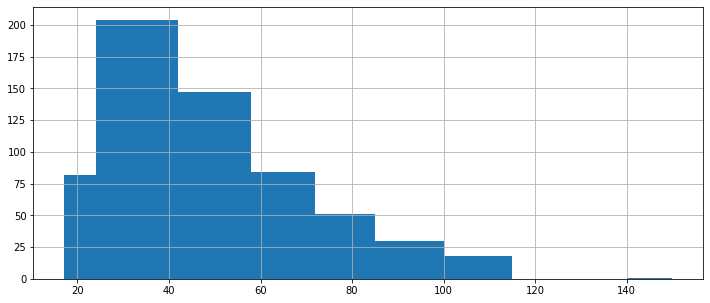

In [37]:
print('Ежемесячно среднее количество сообщений для пользователей тарифа «Смарт» составляет'
      ,round((all_smart['sms'].mean()),1))
print('Дисперсия выборки сообщений, отправляемых пользователями тарифа «Смарт» составляет',
      round((np.var(all_smart['sms'], ddof=1)),1))
print('Стандартное отклонение количества сообщений, отправляемых пользователями тарифа «Смарт» составляет',
      round((np.std(all_smart['sms'], ddof=1)),1))
all_smart['sms'].hist(bins = [17, 24, 42, 58, 72, 85, 100, 115, 127, 140, 150], figsize=(12, 5))
all_smart['sms'].describe()

 Среднее количество сообщений, ежемесячно отправляемых пользователями тарифа «Смарт» равно 32. Гистограмма частоты среднего количества сообщений имеет пиковое значение в пределах от 25 до 43, положительно направленную скошенность. Стандартное отклонение (27) приближено к среднему значению. Все это в совокупности свидетельствует о том, что в выборка представлена пользователями тарифом "Смарт" с сильным разбросом данных о среднемесячном направлении смс, которые по большей части выходят далеко за пределы лимитированных 50 сообщений. Также имеется выброс значений на уровне 140-150 сообщений, который можно считать аномальным.   

Ежемесячно среднее количество сообщений для пользователей тарифа «Ультра» составляет 49.4
Дисперсия выборки сообщений, отправляемых пользователями тарифа «Ультра» составляет 2285.3
Стандартное отклонение количества сообщений, отправляемых пользователями тарифа «Ультра» составляет 47.8


count    985.000000
mean      49.363452
std       47.804457
min        0.000000
25%        6.000000
50%       38.000000
75%       79.000000
max      224.000000
Name: sms, dtype: float64

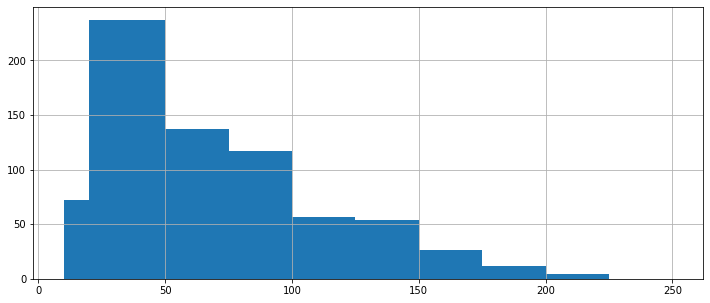

In [38]:
print('Ежемесячно среднее количество сообщений для пользователей тарифа «Ультра» составляет'
      ,round((all_ultra['sms'].mean()),1))
print('Дисперсия выборки сообщений, отправляемых пользователями тарифа «Ультра» составляет',
      round((np.var(all_ultra['sms'], ddof=1)),1))
print('Стандартное отклонение количества сообщений, отправляемых пользователями тарифа «Ультра» составляет',
      round((np.std(all_ultra['sms'], ddof=1)),1))
all_ultra['sms'].hist(bins = [10, 20, 50, 75, 100, 125, 150, 175, 200, 225, 250], figsize=(12, 5))
all_ultra['sms'].describe()

 Среднее количество сообщений, ежемесячно отправляемых пользователями тарифа «Ультра» равно 49. Чаще других встречаются пользователи, которые направляют от 30 до 50 сообщений. Стандартное отклонение (47) очень близко к среднему значению, говорит о большой расбросанности данных. Сильная положительно  направленная скошенность гистограммы свидетельствует о превалировании значений выше среднего. Однако, даже максимальное значение (224 сообщения) очень далеко от лимитированных тарифом 1000 сообщений. 

 Производим рассчеты по телефонным разговорам. 

Ежемесячно среднее количество минут телефонных разговоров пользователей тарифа «Смарт» составляет 418.8
Дисперсия выборки среднего количества минут телефонных разговоров пользователей тарифа «Смарт» составляет 29944.0
Стандартное отклонение среднего количества минут телефонных разговоров пользователей тарифа «Смарт» составляе 173.0


count     985.000000
mean      418.821320
std       173.043243
min         7.000000
25%       306.000000
50%       419.000000
75%       539.000000
max      1000.000000
Name: calls_duration, dtype: float64

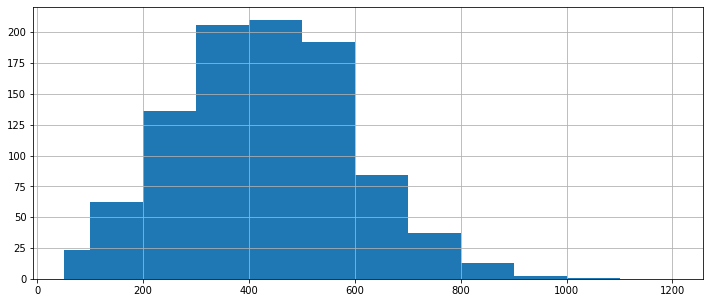

In [39]:
print('Ежемесячно среднее количество минут телефонных разговоров пользователей тарифа «Смарт» составляет'
      ,round((all_smart['calls_duration'].mean()),1))
print('Дисперсия выборки среднего количества минут телефонных разговоров пользователей тарифа «Смарт» составляет',
      round((np.var(all_smart['calls_duration'], ddof=1)),1))
print('Стандартное отклонение среднего количества минут телефонных разговоров пользователей тарифа «Смарт» составляе',
      round((np.std(all_smart['calls_duration'], ddof=1)),1))
all_smart['calls_duration'].hist(bins = [50, 100,  200, 300, 400, 500, 600, 700, 800, 900, 1000,1100, 1200], figsize=(12, 5))
all_smart['calls_duration'].describe()

 Среднее количество минут телефонных разговоров,  ежемесячно расходуемых пользователями тарифа «Смарт» равно 418. Гистограмму можно считать симметричной, что говорит о распределении данных, близком к нормальному. Значительная доля пользователей тарифом "Смарт" старается придерживаться лимитированных 500 минут разговора (300-500 мин.). Однако велика доля и тех, кто тратит на разговоры по 600 мин., а это уже за пределами лимита. 

Ежемесячно среднее количество минут телефонных разговоров пользователей тарифа «Ультра» составляет 526.6
Дисперсия выборки среднего количества минут телефонных разговоров пользователей тарифа «Ультра» составляет 100873.6
Стандартное отклонение среднего количества минут телефонных разговоров пользователей тарифа «Ультра» составляет 317.6


count     985.000000
mean      526.623350
std       317.606098
min         0.000000
25%       284.000000
50%       518.000000
75%       752.000000
max      1673.000000
Name: calls_duration, dtype: float64

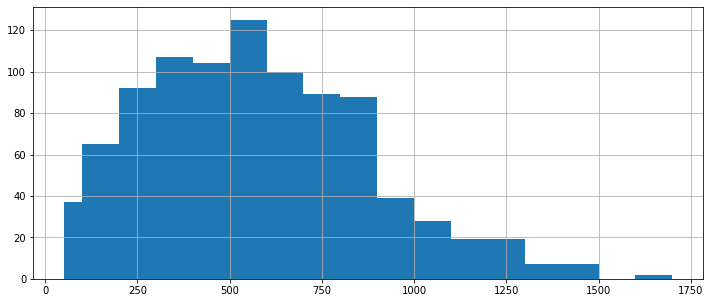

In [40]:
print('Ежемесячно среднее количество минут телефонных разговоров пользователей тарифа «Ультра» составляет'
      ,round((all_ultra['calls_duration'].mean()),1))
print('Дисперсия выборки среднего количества минут телефонных разговоров пользователей тарифа «Ультра» составляет',
      round((np.var(all_ultra['calls_duration'], ddof=1)),1))
print('Стандартное отклонение среднего количества минут телефонных разговоров пользователей тарифа «Ультра» составляет',
      round((np.std(all_ultra['calls_duration'], ddof=1)),1))
all_ultra['calls_duration'].hist(bins = [50, 100, 200, 300, 400, 500, 600, 700, 800,900
                                         ,1000, 1100, 1200, 1300, 1500, 1600, 1700], figsize=(12, 5))
all_ultra['calls_duration'].describe()

 Среднее количество минут телефонных разговоров, ежемесячно расходуемых пользователями тарифа «Ультра», 526.  Это значительно меньше установленных лимитом 3000 минут разговоров в месяц. Гистограмма частоты достигает пиковой величины в интервале 500-550 минут. Вместе с тем, значительная доля пользователей тратит на разговоры от 200 до 900 минут. За этим пределом гистограмма резко уходит вправо до отметки 1500 мин. с аномалией в пределах 1600-1700 мин. Но даже с учетом этой скошенности, аномалий и большего по сравнению со "Смартом" разброса данных, пользователи тарифом "Ультра" далеко не выговаривают установленных 3000 минут.   

 Производим рассчеты по использованию интернета. 

Ежемесячно средний объем интернет-трафика пользователей тарифа «Смарт» составляет 16.4
Дисперсия выборки среднего объема интернет-трафика пользователей тарифа «Смарт» составляет 32.5
Стандартное отклонение среднего объема интернет-трафика пользователей тарифа «Смарт» составляет 5.7


count    985.000000
mean      16.448731
std        5.702629
min        1.000000
25%       13.000000
50%       16.000000
75%       20.000000
max       37.000000
Name: mb_used, dtype: float64

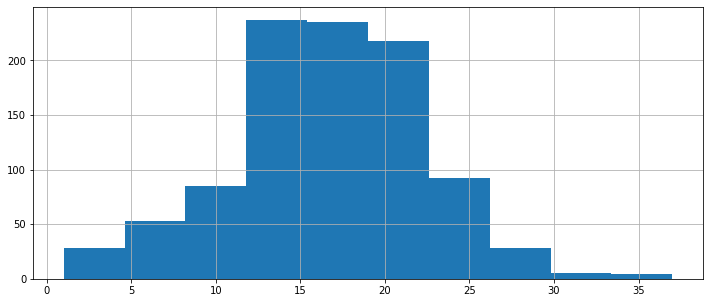

In [41]:
print('Ежемесячно средний объем интернет-трафика пользователей тарифа «Смарт» составляет'
      ,round((all_smart['mb_used'].mean()),1))
print('Дисперсия выборки среднего объема интернет-трафика пользователей тарифа «Смарт» составляет',
      round((np.var(all_smart['mb_used'], ddof=1)),1))
print('Стандартное отклонение среднего объема интернет-трафика пользователей тарифа «Смарт» составляет',
      round((np.std(all_smart['mb_used'], ddof=1)),1))
all_smart['mb_used'].hist( figsize=(12, 5))
all_smart['mb_used'].describe()

  Гистограмму можно считать симметричной, что говорит о нормальном распределении данных. В целом пользователи тарифом «Смарт» сильно переплачивают за интернет. При лимите тарифоного плана в  15 гигабайт интернет-трафика, среднее значение (16.44 Гб) его превышает, а "пик" пользований приходится на интервал 13 - 18 Гб. Значительная же доля пользователей расходует интернет-трафик в пределах 13-22 Гб. Также наблюдаются аномалии от 30 до 40 Гб. 

Ежемесячно средний объем интернет-трафика пользователей тарифа «Ультра» составляет 19.5
Дисперсия выборки среднего объема интернет-трафика пользователей тарифа «Ультра» составляет 97.1
Стандартное отклонение среднего объема интернет-трафика пользователей тарифа «Ультра» составляет 9.9


count    985.000000
mean      19.494416
std        9.853511
min        0.000000
25%       12.000000
50%       19.000000
75%       27.000000
max       49.000000
Name: mb_used, dtype: float64

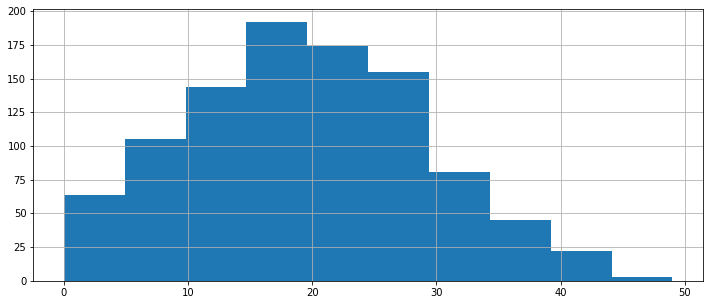

In [42]:
print('Ежемесячно средний объем интернет-трафика пользователей тарифа «Ультра» составляет'
      ,round((all_ultra['mb_used'].mean()),1))
print('Дисперсия выборки среднего объема интернет-трафика пользователей тарифа «Ультра» составляет',
      round((np.var(all_ultra['mb_used'], ddof=1)),1))
print('Стандартное отклонение среднего объема интернет-трафика пользователей тарифа «Ультра» составляет',
      round((np.std(all_ultra['mb_used'], ddof=1)),1))
all_ultra['mb_used'].hist( figsize=(12, 5))
all_ultra['mb_used'].describe()

 Гистограмму распределения среднего пользования интернетом по тарифу "Ультра", как и по тарифу "Смарт" можно считать симметричной, что говорит о нормальном распределении данных. При среднем значении расходования 19 Гб, основная доля распределена в пределах 10-29 Гб. Имеются те, кто превышает лимитированные тарифом 30 Гб (почти до 50 Гб), но эта доля значительно меньше пользователей тарифом "Смарт", не укладывающихся в лимит. 

#### Вывод

 Для пользователей тарифом "Смарт" характерно следующее. Несмотря на то, что доля пользователей, которые укладываются в лимитированные тарифом 50 сообщений в месяц и направляют по 25-45 смс наиболее высока, основная их масса сильно выходит за этот предел и переплачивает за сверхлимитные сообщения, которые варируются в количестве от 55 до 115. Что касается телефонных разговоров, то значительная часть пользователей  старается придерживаться лимитированных 500 минут разговора и тратит по 300-500 мин. Однако велика доля и тех, кто расходует по 600 мин., а это уже за пределами лимита и образует переплату. Также эта группа пользователей сильно переплачивает за интернет. При лимите тарифоного плана в  15 гигабайт интернет-трафика, "пик" пользований приходится на интервал 13 - 18 Гб. Значительная же доля пользователей расходует интернет-трафик в пределах от 10 до 25 Гб.

 Для пользователей тарифом "Ультра" характерно следующее. Наибольшая группа пользователей ежемесячно направляет от 30 до 50 сообщений, однако, основная часть направляет от 50 до 200 сообщений. Однако это все равно гораздо меньше лимитированных тарифом 1000 сообщений. Что касается телефонных разговоров, то основная доля пользователей тратит на разговоры от 200 до 900 минут. Имеются выбросы значений около 1600 минут, но даже с их учетом пользователи тарифом "Ультра" далеко не выговаривают установленных 3000 минут. Пользование интернет-соединением таково, что основная доля распределена в пределах 10-29 Гб. Имеются те, кто превышает лимитированные тарифом 30 Гб (почти до 50 Гб), но эта доля значительно меньше пользователей тарифом "Смарт", не укладывающихся в лимит. 

### Проверка гипотез.

#### Проверка гипотезы: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

 По условию проекта нам необходимо проверить гипотезу:средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются. Для проверки гипотезы программным методом в начале проекта мы импортировали модуль stats Python-библиотеки scipy.

 У нас есть две равновеликие выборки, позволяющие сформулировать нулевую и альтернативную гипотезу о равенстве средней выручки пользователей тарифов «Ультра» и «Смарт», которая является гипотезой о равенстве средних двух генеральных совокупностей по взятым ихз них выборкам. 
    
    
    
Сформулируем нулевую гипотезу H0: средняя ежемесячная выручка компании "Мегалайн" от пользователей тарифом «Смарт» равна средней ежемесячной выручке пользователей тарифом «Ультра». Альтернативная гипотеза H1: средняя выручка пользователей тарифом Смарт» не равна средней выручке пользователей тарифом «Ультра».
    
    
    
Для проверки нулевой гипотезы передадим методу st.ttest_ind() данные по выборке из генеральной совоупности, которые мы сохранили в all_smart и all_ultra. Критический уровень статистической значимости alpha, за пределами которого можно отвергнуть нулевую гипотезу, зададим общепринятый .05. Результаты проверки нулевой гипотезы сохраним в переменной results_tariff. Параметр equal_var указывать не станем, по умолчанию он примет значение True при котором метод объединяет обе выборки в одну, чтобы точнее оценить дисперсию.

In [43]:
alpha = .05
results_tariff = st.ttest_ind(all_ultra['pay'], all_smart['pay']) 
print('p-значение:', results_tariff.pvalue)
if results_tariff.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.750129627559167e-146
Отвергаем нулевую гипотезу


 Р-value у нас имеет экспоненциальную запись числа (1.750129627559167e-146), которая в переводе на десятичную означает указанное число умноженное на 10 в отрицательной степени (-146), что  означает его ничтожную малость. Иными словами p-value  значительно меньше установленного нами уровня статистической значимости (5%). Это значит, что вероятность ошибки при отклонении нулевой гипотезы практически сведена к 0, что не позводяет сделать вывод о равенстве средней выручки. Таким образом мы отвергаем нулевую гипотезу о том, что средняя ежемесячная выручка компании "Мегалайн" от пользователей тарифом «Смарт» равна средней ежемесячной выручке пользователей тарифом «Ультра». 

 Попробуем в цифрах сопоставить среднюю ежемесячную выручку от обоих тарифов. Для этого применим метод mean(). 

In [44]:
print('Ежемесячная средняя выручка пользователей тарифа «Смарт» составляет',round((all_smart['pay'].mean()),1))
print('Ежемесячная средняя выручка пользователей тарифа «Ультра» составляет',round ((all_ultra['pay'].mean()),1))

Ежемесячная средняя выручка пользователей тарифа «Смарт» составляет 1276.5
Ежемесячная средняя выручка пользователей тарифа «Ультра» составляет 2070.2


  Среднее значение ежемесячной выручки пользователей тарифом «Смарт» значительно меньше чем по пользователям тарифом «Ультра». Попробуем провести односторонний тест, чтоб проверить одностороннюю гипотезу. Применим метод scipy.stats.ttest_1samp(), который используется для проверки двусторонних гипотез на соответствие заданному числу, а результат поделим пополам.
    
Сформулируем нулевую гипотезу H0: средняя ежемесячная выручка  компании "Мегалайн" от пользователей тарифом «Смарт» равна средней ежемесячной выручке пользователей тарифом «Ультра». Альтернативная гипотеза H1: средняя выручка пользователей тарифом Смарт» меньше средней выручки пользователей тарифом «Ультра». 
    
В качестве предполагаемой величины средней выручки от тарифа "Смарт" возьмем расчитанную нами среднюю выручку от тарифа "Ультра" v = 2070.7 руб. Если при проверке нулевой гипотезы вероятность получить ожидаемый результат (Р-value) окажется меньше заданного нами уровня статистической значимости (alpha = .05), мы отвергнем нулевую гипотезу.    
    

In [45]:
v = 2070.2
alpha = .05 
results = st.ttest_1samp(all_smart['pay'], v)
print('p-значение:', results.pvalue / 2)
if (results.pvalue / 2 < alpha) and (all_smart['pay'].mean() < v):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу") 

p-значение: 1.9842191022717025e-148
Отвергаем нулевую гипотезу


 Р-value в проведенном тесте представлено экспоненциальной записью числа (1.9842191022717025e-148) с отрицательной степенью, которая показывает его его ничтожную малость. Значит вероятность получить предполагаемый результат (равенство средней выручки по тарифу "Смарт" 2070.2 руб.) очень мала и мы отвергаем нулевую гипотезу о том, что средняя ежемесячная выручка компании "Мегалайн" от пользователей тарифом «Смарт» равна средней ежемесячной выручке пользователей тарифом «Ультра». 

  Проверкой программным методом выгодности для компании "Мегалайн" тарифов "Смарт" и "Ультра" опровергнута гипотеза о равенстве средней ежемесячной выручки указанных тарифов. Также проверка показала, что вероятность случайно получить среднемесячную выручку от тарифа "Смарт" в размере равном или больше чем от тарифа "Ультра"то ничтожно мала. 

#### Проверка гипотезы: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

 Для проверки гипотезы в которой будут соотнесены средняя выручка пользователей из Москвы со средней выручкой пользователей из других регионов нам необходимо выделить отдельно данные по Москве и отдельно по остальным городам. Для этой цели категоризируем данные столбца 'city' путем создания функции, которая все города кроме Москвы переименует в 'другие'.  

In [46]:
def city (city):
    if city == 'Москва':
        return 'Москва'
    else:
        return 'другие'
all_df['city'] = all_df['city'].apply(city)
display(all_df)
all_df['city'].value_counts()

,user_id,month,calls_duration,mb_used,sms,tariff,city,minutes_pay,messages_pay,mb_pay,pay
0,1000,5,159.0,3.0,22.0,ultra,другие,0.0,0.0,0.0,1950.0
1,1000,6,172.0,23.0,60.0,ultra,другие,0.0,0.0,0.0,1950.0
2,1000,7,340.0,14.0,75.0,ultra,другие,0.0,0.0,0.0,1950.0
3,1000,8,408.0,14.0,81.0,ultra,другие,0.0,0.0,0.0,1950.0
4,1000,9,466.0,15.0,57.0,ultra,другие,0.0,0.0,0.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,0.0,11.0,17.0,smart,другие,0.0,0.0,0.0,550.0
3210,1489,9,0.0,17.0,32.0,smart,другие,0.0,0.0,400.0,950.0
3211,1489,10,0.0,20.0,21.0,smart,другие,0.0,0.0,1000.0,1550.0
3212,1489,11,0.0,18.0,20.0,smart,другие,0.0,0.0,600.0,1150.0


другие    2603
Москва     611
Name: city, dtype: int64

 Теперь в нашем основном датасете all_df значения столбца с наименованием  города пользователя категоризированы на Москву и другие. Из этой совокупности данных сделаем срезы в зависимости от данных столбца 'city', которые назовем Moscow и others. Поскольку пользователей из других городов в несколько раз больше пользователей из Москвы, возьмем из others объем, сопоставимый с Moscow (611 строк).

In [47]:
Moscow = all_df.query('city == "Москва"').reset_index(drop=True)
others = (all_df.query('city == "другие"').reset_index(drop=True)).head(611)
display(Moscow)
display(others)

,user_id,month,calls_duration,mb_used,sms,tariff,city,minutes_pay,messages_pay,mb_pay,pay
0,1001,11,430.0,18.0,0.0,smart,Москва,0.0,0.0,600.0,1150.0
1,1001,12,414.0,14.0,0.0,smart,Москва,0.0,0.0,0.0,550.0
2,1003,8,380.0,9.0,37.0,ultra,Москва,0.0,0.0,0.0,1950.0
3,1003,9,961.0,13.0,91.0,ultra,Москва,0.0,0.0,0.0,1950.0
4,1003,10,855.0,15.0,83.0,ultra,Москва,0.0,0.0,0.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...
606,1490,9,322.0,15.0,48.0,smart,Москва,0.0,0.0,0.0,550.0
607,1490,10,312.0,21.0,45.0,smart,Москва,0.0,0.0,1200.0,1750.0
608,1490,11,282.0,19.0,47.0,smart,Москва,0.0,0.0,800.0,1350.0
609,1490,12,290.0,16.0,46.0,smart,Москва,0.0,0.0,200.0,750.0


,user_id,month,calls_duration,mb_used,sms,tariff,city,minutes_pay,messages_pay,mb_pay,pay
0,1000,5,159.0,3.0,22.0,ultra,другие,0.0,0.0,0.0,1950.0
1,1000,6,172.0,23.0,60.0,ultra,другие,0.0,0.0,0.0,1950.0
2,1000,7,340.0,14.0,75.0,ultra,другие,0.0,0.0,0.0,1950.0
3,1000,8,408.0,14.0,81.0,ultra,другие,0.0,0.0,0.0,1950.0
4,1000,9,466.0,15.0,57.0,ultra,другие,0.0,0.0,0.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...
606,1118,5,582.0,16.0,0.0,smart,другие,246.0,0.0,200.0,996.0
607,1118,6,681.0,14.0,0.0,smart,другие,543.0,0.0,0.0,1093.0
608,1118,7,839.0,15.0,0.0,smart,другие,1017.0,0.0,0.0,1567.0
609,1118,8,747.0,18.0,0.0,smart,другие,741.0,0.0,600.0,1891.0


 Теперь объем данных одинаков. Но перед тем, как сформулируем гипотезы посчитаем среднее значение ежемесячной выручки по каждой из групп выбранных данных. 

In [48]:
print('Среднее значение ежемесячной выручки по Москве составляет',round((Moscow['pay'].mean()),1))
print('Среднее значение ежемесячной выручки по другим регионам составляет',round((others['pay'].mean()),1))

Среднее значение ежемесячной выручки по Москве составляет 1546.7
Среднее значение ежемесячной выручки по другим регионам составляет 1490.1


  Сформулируем нулевую гипотезу H0: средняя выручка пользователей из Москвы и средняя выручка пользователей из других регионов равны. Альтернативная гипотеза H1:  средняя выручка пользователей  из Москвы и средняя выручка пользователей из других регионов не равны. 

 Проверку нулевой гипотезы осуществим методом st.ttest_ind(), которому передадим выборочные значения из Moscow и others. Критический уровень статистической значимости alpha, за пределами которого можно отвергнуть нулевую гипотезу зададим общепринятый .05. Результаты проверки нулевой гипотезы сохраним в переменной results_cities. Параметр equal_var указывать не станем, по умолчанию он примет значение True при котором метод объединяет обе выборки в одну, чтобы точнее оценить дисперсию.

In [49]:
alpha = .05
results_cities = st.ttest_ind(others['pay'], Moscow['pay']) 
print('p-значение:', results_cities.pvalue)
if results_cities.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.19557853948126458
Не получилось отвергнуть нулевую гипотезу


 Полученное значение p-value говорит о том, что несмотря на разницу между средним значением ежемесячной выручки компании "Мегалайн" по Москве и средним значением ежемесячной выручки по другим регионам, вероятность получить получить одинаковые значения составляет более 19% (иными словами -  вероятность ошибки при отклонении нулевой гипотезы составляет более 19%), что больше установленного нами критического уровня статистической значимости 5%. В результате проведенного теста наша нулевая гипотеза о том, что средняя выручка компании "Мегалайн" от предоставления услуг связи по "Москве" равна средней выручке по другим регионам не опровергнута. При таком результате альтернативную гипотезу не проверяем.

### Финальный вывод.

 Мы провели исследовательский анализ данных федерального оператора сотовой связи «Мегалайн» на предмет определения приоритетности развития тарифных планов в зависимости от их доходности и корректировки в этой связи рекламного бюджета. Для исследования были предоставлены данные 500 пользователей «Мегалайна» за 2018 год, которые используют тарифы «Смарт» и «Ультра». 
 
 Перед началом исследования проведена предобработка информации «Мегалайна», в ходе которой даты пользования соответствующими видами связи, представленные типом 'object' переведены в тип datetime. Данные о длительности телефонных переговоров, изначально показанные как 'float', переведены в цельночисленный вид с округлением в большую сторону. В ходе исследования в аналогичном порядке произведен перевод информации об использовании интернет-трафика (из мегабайт в гигабайты). Созданы дополнительные столбцы с данными о месяце пользования связью (по каждому виду). Также для исследования создан объединенный датафрейм, в котором саккумулированны сведения об объемах использования клиентами каждого вида связи, выручке, полученной с каждого клиента в соответствующий месяц пользования связью по каждому из тарифов, на основе которых произведены репрезентативные на наш взгляд выборки. Построены графики. В ходе исследования путем анализа цифровых показателей, гистограмм, сформулированы и проверены программными методами гипотезы относительно финансовой приоритетности тарифов и территорий развития для компании «Мегалайн». На основе исследования сделаны выводы.
 
 Изначально тарифные планы разрабатываются таким образом, что объем предоставляемых услуг и оплата за них по любому из тарифов потенциально одинаковы для компании. В процессе реализации эти тарифные планы либо корректируются, либо в приоритетном порядке развивается наиболее выгодный (для компании). Анализ ежемесячного пользования связью показал следующее.
Пользователи тарифом "Ультра", в основном, укладываются в лимиты, предусмотренные тарифом по каждому из видов связи. Основная часть направляет от 50 до 200 сообщений (при тарифном лимите 1000), тратит на телефонные разговоры от 200 до 900 минут (лимит 3000 мин.). Переплаты за сверхлимитное пользование связью имеется по интернет-сессиям, которые, в основном, находятся в пределах 10-29 Гб. Имеются те, кто превышает лимитированные тарифом 30 Гб (почти до 50 Гб), но эта доля значительно меньше пользователей тарифом "Смарт", не укладывающихся в лимит.

Иная картина по пользователям тарифом "Смарт". Данная группа пользователей переплачивает за все виды связи. При лимите 50 сообщений в месяц значительная часть направляет от 55 до 115 смс. Велика доля тех, кто тратит на телефонные переговоры по 600 минут (по тарифу - 500 мин.). Также эта группа пользователей сильно переплачивает за интернет. При лимите тарифоного плана в 15 гигабайт интернет-трафика, "пик" пользований приходится на интервал 13 - 18 Гб. Значительная же их часть расходует интернет-трафик в пределах от 13 до 22 Гб.

Если рассматривать выгодность тарифа для компании с точки зрения объема платежей сверх запланированных, то тариф "Смарт" для "Мегалайна" представляется более предпочтительным за счет переплат пользователями за услуги по всем видам связи.

В процессе исследования проверена гипотеза о равенстве средней выручки от пользователей тарифом "Смарт" и пользователей тарифом «Ультра». С этой целью проведены двусторонний тест равенства средних двух генеральных совокупностей по взятым из них выборкам c нулевой гипотезой "средняя ежемесячная выручка компании "Мегалайн" от пользователей тарифом «Смарт» равна средней ежемесячной выручке пользователей тарифом «Ультра»" и односторонний - с альтернативной гипотезой "средняя выручка от пользователей тарифом "Смарт" меньше средней выручки от пользователей тарифом «Ультра»". Проверенный программным методом st.ttest_ind() первый тест не опроверг нулевую гипотезу. Проверка, проведенная программным методом st.ttest_1samp() показала, что вероятность случайно получить среднемесячную выручку от тарифа "Смарт" в размере равном или большем чем от тарифа "Ультра" ничтожно мала.

В целом на основании проведенного исследования для получения наибольшей прибыли компании "Мегалайн" возможно рекомендовать ориентировать рекламный бюджет на продвижение тарифа "Смарт". Несмотря на то, что не опровергнуто наше предположение о том, что средняя выручка от пользователей тарифом "Смарт" меньше средней выручки от пользователей тарифом "Ультра", сверхплановая выручка будет обеспечена за счет сверхлимитного использования клиентами всех видов связи. Также можно рекомендовать активнее рекламировать тариф "Смарт" не в мегаполисах (к которым относится Москва), а в меньших по численности населенных пунктах. Поскольку тариф "Ультра" является дорогим, предпочтение ему будут отдавать в дорогих городах, к которым относится Москва. В других регионах востребованы более экономичные с точки зрения потребителя тарифы, типа "Смарт". Результативность его рекламного продвижения представляется более реалистичной, а с учетом закона экономики о получении наибольшей прибыли на большем обороте капитала, и более экономически выгодной.